In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# File inventory

In [2]:
pd.DataFrame()

Empty DataFrame
Columns: []
Index: []

In [3]:
changes = [i/10 for i in range(2,19)]

change_sets = []
for c_x in changes:
    for c_y in changes:
        change_sets.append([c_x, c_y])

inventory_df = pd.DataFrame(change_sets, columns=['x_change', 'y_change'])

In [4]:
inventory_df['file'] = [f'/GridSimulations/Grid-run-{i}-780sims.csv' for i in range(len(change_sets))]

In [5]:
inventory_df

x_change  y_change                                       file
0         0.2       0.2    /GridSimulations/Grid-run-0-780sims.csv
1         0.2       0.3    /GridSimulations/Grid-run-1-780sims.csv
2         0.2       0.4    /GridSimulations/Grid-run-2-780sims.csv
3         0.2       0.5    /GridSimulations/Grid-run-3-780sims.csv
4         0.2       0.6    /GridSimulations/Grid-run-4-780sims.csv
..        ...       ...                                        ...
284       1.8       1.4  /GridSimulations/Grid-run-284-780sims.csv
285       1.8       1.5  /GridSimulations/Grid-run-285-780sims.csv
286       1.8       1.6  /GridSimulations/Grid-run-286-780sims.csv
287       1.8       1.7  /GridSimulations/Grid-run-287-780sims.csv
288       1.8       1.8  /GridSimulations/Grid-run-288-780sims.csv

[289 rows x 3 columns]

# Verification of the order

In [6]:
folder = '/home/arnaud/POMDP_PBVI_Exploration/Experiments/Olfactory Navigation/Test_olf_nav_alt_20240206_180031/GridSimulations/'

In [7]:
df = pd.read_csv(folder + 'Grid-run-4-dx0.2-dy0.6-780sims.csv')

In [8]:
df['extra_steps'].mean()

532.3397435897435

# Extra steps

In [9]:
files = os.listdir(folder)

extra_steps = []

for f in files:
    df = pd.read_csv(folder + f)
    extra_steps.append(df['extra_steps'].to_list())

extra_steps = np.array(extra_steps)

In [10]:
extra_steps_grid = extra_steps.reshape((17,17,780))

In [11]:
extra_steps_averages = np.average(extra_steps_grid, axis=2)

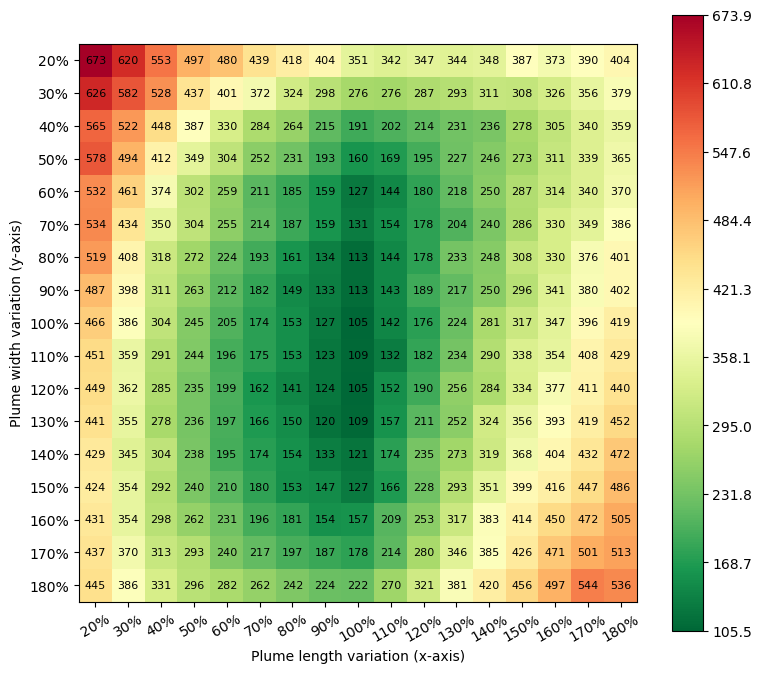

In [12]:
plt.figure(figsize=(9,8))

plt.imshow(extra_steps_averages.T, cmap='RdYlGn_r')
plt.colorbar(ticks=np.linspace(np.min(extra_steps_averages), np.max(extra_steps_averages), 10))

for i in range(17):
    for j in range(17):
        plt.annotate(int(extra_steps_averages[i,j]), (i,j), ha='center', va='center', fontsize=8)

plt.xticks(list(range(17)), [f'{i*10}%' for i in range(2,19)], rotation=30)
plt.yticks(list(range(17)), [f'{i*10}%' for i in range(2,19)])

plt.xlabel('Plume length variation (x-axis)')
plt.ylabel('Plume width variation (y-axis)')

plt.show()

# Unconverged

In [13]:
unconverged_percentage = []
sim_count = 780

for f in files:
    df = pd.read_csv(folder + f)
    unconverged_percentage.append(((df['steps_taken'] == 1001).sum() * 100) / sim_count)

unconverged_percentage = np.array(unconverged_percentage)

In [14]:
unconverged_percentage_grid = unconverged_percentage.reshape((17,17))

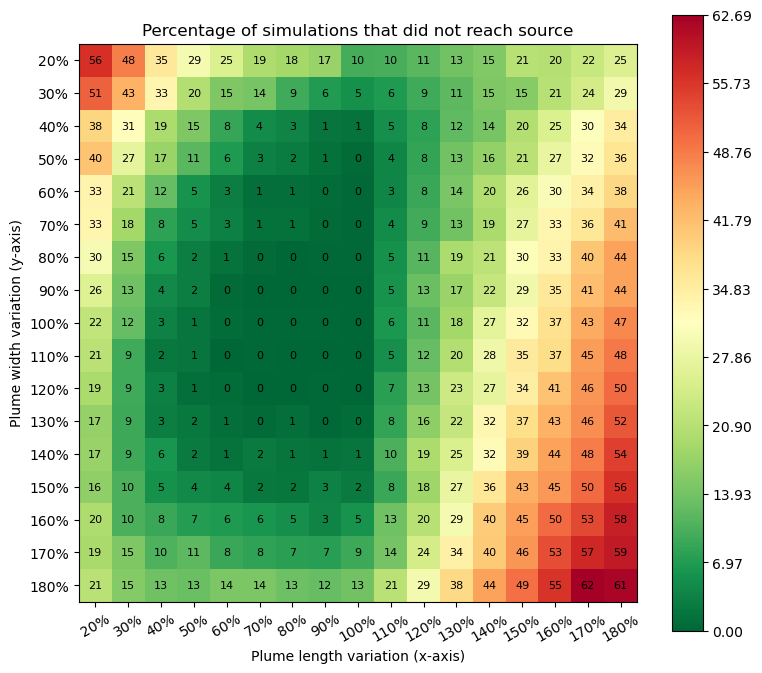

In [15]:
plt.figure(figsize=(9,8))
plt.title('Percentage of simulations that did not reach source')

plt.imshow(unconverged_percentage_grid.T, cmap='RdYlGn_r')
plt.colorbar(ticks=np.linspace(np.min(unconverged_percentage), np.max(unconverged_percentage), 10))

for i in range(17):
    for j in range(17):
        plt.annotate(int(unconverged_percentage_grid[i,j]), (i,j), ha='center', va='center', fontsize=8)

plt.xticks(list(range(17)), [f'{i*10}%' for i in range(2,19)], rotation=30)
plt.yticks(list(range(17)), [f'{i*10}%' for i in range(2,19)])

plt.xlabel('Plume length variation (x-axis)')
plt.ylabel('Plume width variation (y-axis)')

plt.show()

# Extra proportion filtered

In [16]:
extra_proportion = []

for f in files:
    df = pd.read_csv(folder + f)
    df_filt = df.loc[df['steps_taken'] != 1001]
    extra_proportion.append((df_filt['opt_traj'] / df_filt['steps_taken']).mean())

extra_proportion = np.array(extra_proportion)

In [17]:
extra_proportion_grid = extra_proportion.reshape(17,17)

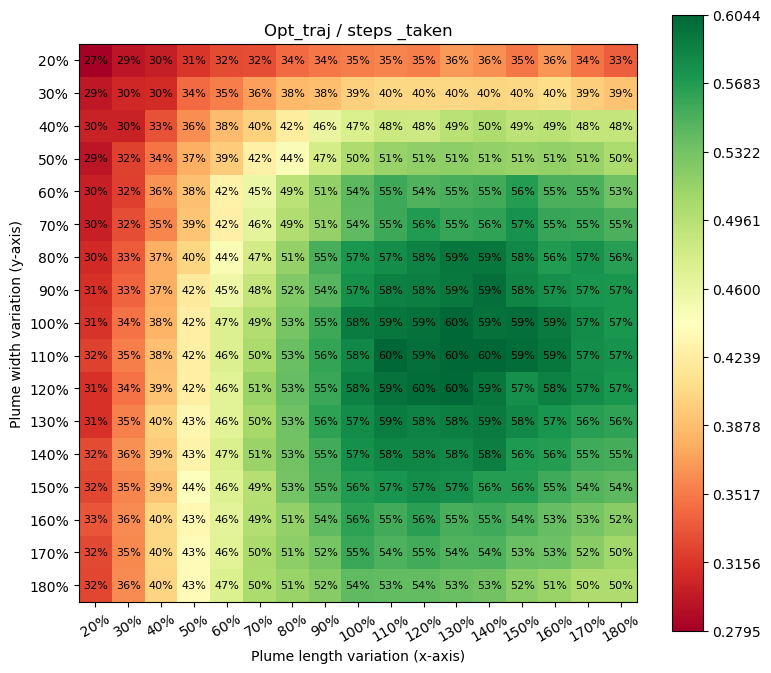

In [18]:
plt.figure(figsize=(9,8))
plt.title('Opt_traj / steps _taken')

plt.imshow(extra_proportion_grid.T, cmap='RdYlGn')
plt.colorbar(ticks=np.linspace(np.min(extra_proportion), np.max(extra_proportion), 10))

for i in range(17):
    for j in range(17):
        plt.annotate(f'{int(extra_proportion_grid[i,j]*100)}%', (i,j), ha='center', va='center', fontsize=8)

plt.xticks(list(range(17)), [f'{i*10}%' for i in range(2,19)], rotation=30)
plt.yticks(list(range(17)), [f'{i*10}%' for i in range(2,19)])

plt.xlabel('Plume length variation (x-axis)')
plt.ylabel('Plume width variation (y-axis)')

plt.show()

# Extra steps filtered

In [19]:
extra_steps_filt = []

for f in files:
    df = pd.read_csv(folder + f)
    df_filt = df.loc[df['steps_taken'] != 1001]
    extra_steps_filt.append((df_filt['extra_steps']).mean())

extra_steps_filt = np.array(extra_steps_filt)

In [20]:
extra_steps_filt_grid = extra_steps_filt.reshape((17,17))

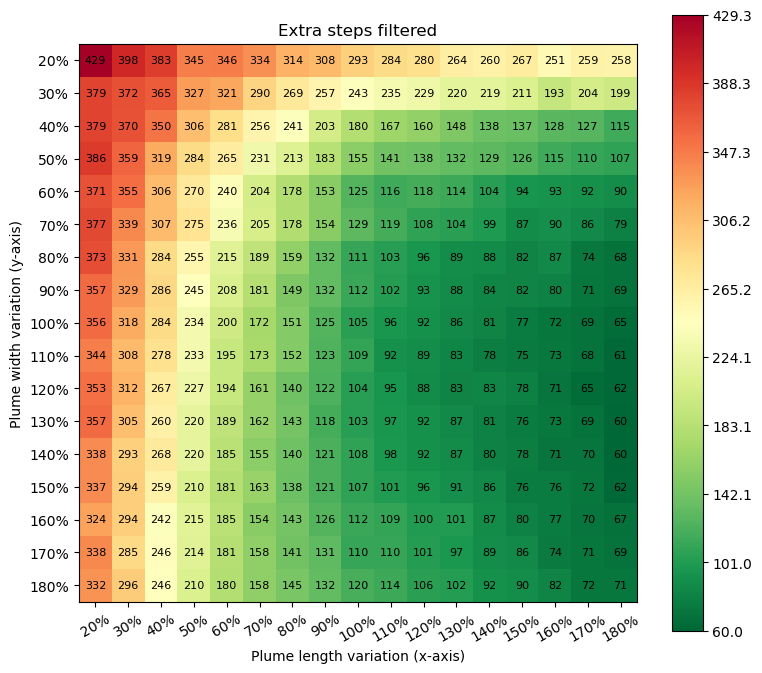

In [21]:
plt.figure(figsize=(9,8))
plt.title('Extra steps filtered')

plt.imshow(extra_steps_filt_grid.T, cmap='RdYlGn_r')
plt.colorbar(ticks=np.linspace(np.min(extra_steps_filt_grid), np.max(extra_steps_filt_grid), 10))

for i in range(17):
    for j in range(17):
        plt.annotate(f'{int(extra_steps_filt_grid[i,j])}', (i,j), ha='center', va='center', fontsize=8)

plt.xticks(list(range(17)), [f'{i*10}%' for i in range(2,19)], rotation=30)
plt.yticks(list(range(17)), [f'{i*10}%' for i in range(2,19)])

plt.xlabel('Plume length variation (x-axis)')
plt.ylabel('Plume width variation (y-axis)')

plt.show()

# Variation on x axis

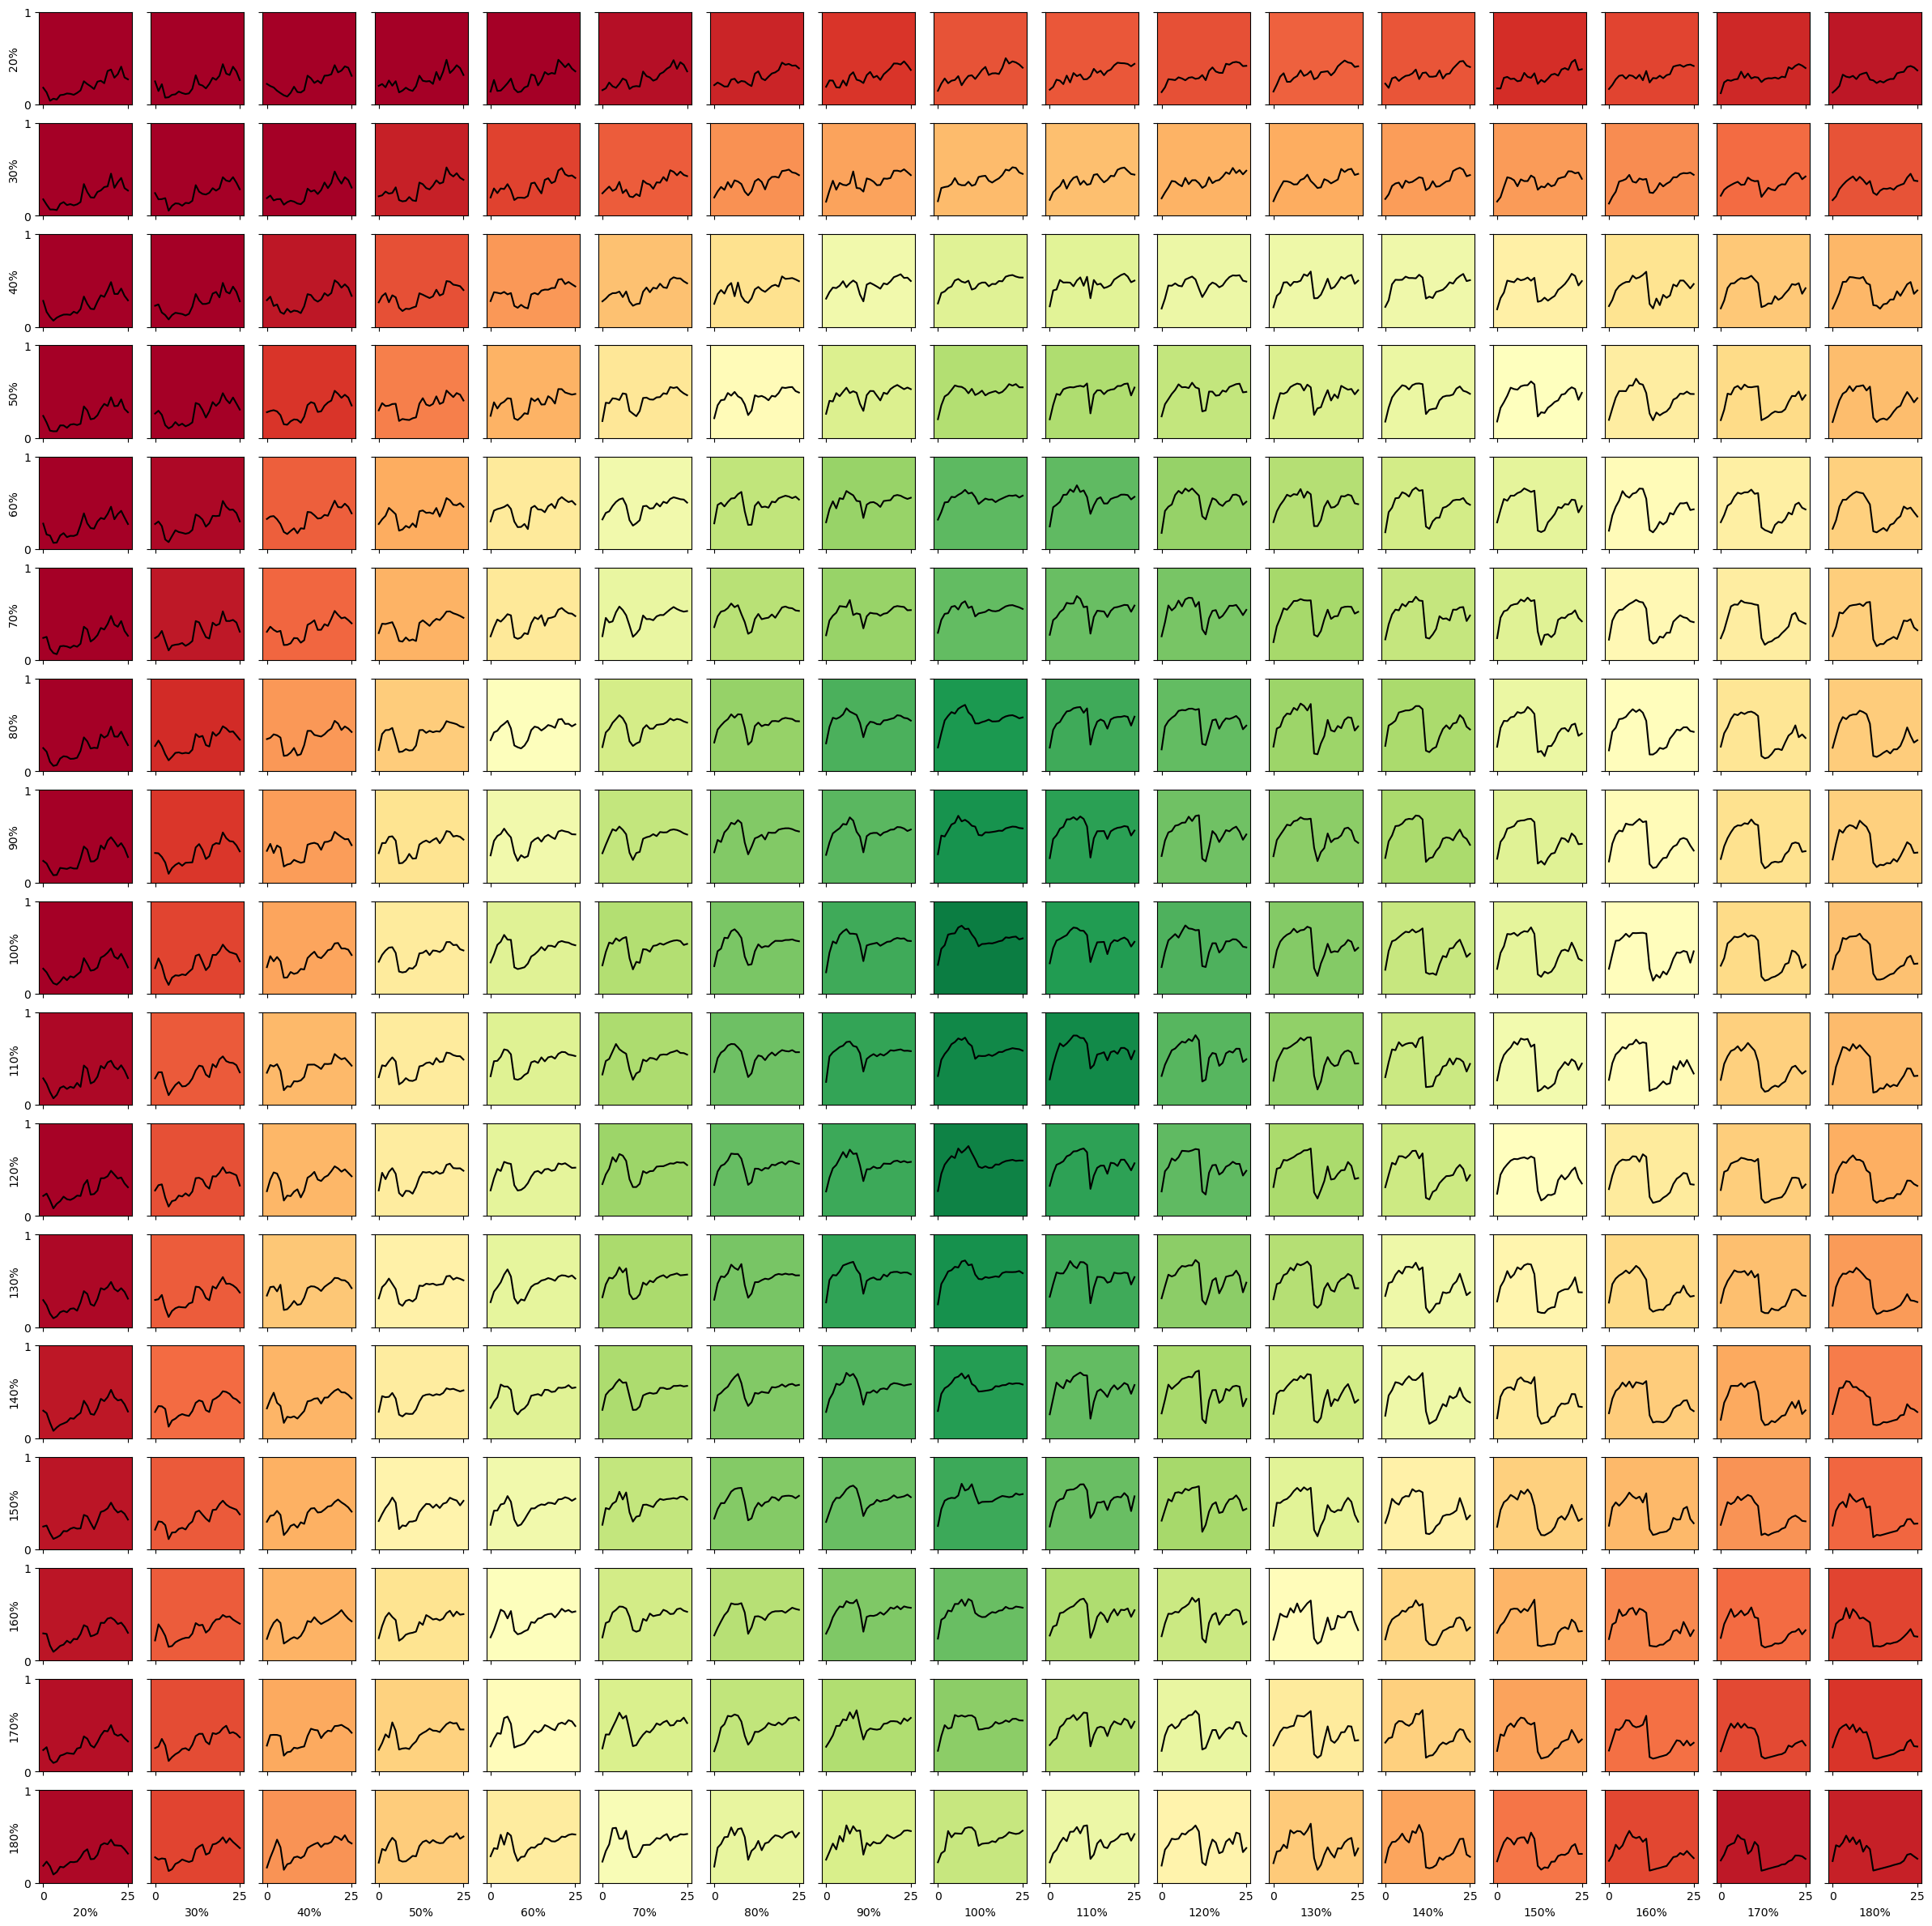

In [22]:
cm = mpl.colormaps['RdYlGn']

min_val = np.min(extra_proportion_grid)
range_val = np.max(extra_proportion_grid) - min_val

fig, axes = plt.subplots(17,17, figsize=(30,30), sharex=True, sharey=True)
ax_list = axes.T.ravel()

for f, ax, (x_change, y_change) in zip(files, ax_list, change_sets):
    df = pd.read_csv(folder + f)
    df['x_cell'] = (df['x'] / 10).astype(int)
    df['opt_to_real'] = df['opt_traj'] / df['steps_taken']
    values = df.groupby('x_cell').agg({'opt_to_real': 'mean'}).to_dict()['opt_to_real'].values()

    avg_val = df['opt_to_real'].mean()
    normalized_avg_val = (avg_val - min_val) / range_val

    ax.set_facecolor(cm(normalized_avg_val))
    ax.plot(np.arange(len(values)), values, color='black')

    ax.set_yticks([0,1])
    if x_change == 0.2:
        ax.set_ylabel(f'{int(y_change * 100)}%')

    ax.set_xticks([0,25])
    if y_change == 1.8:
        ax.set_xlabel(f'{int(x_change * 100)}%')

# Variation on x-axis unconverged

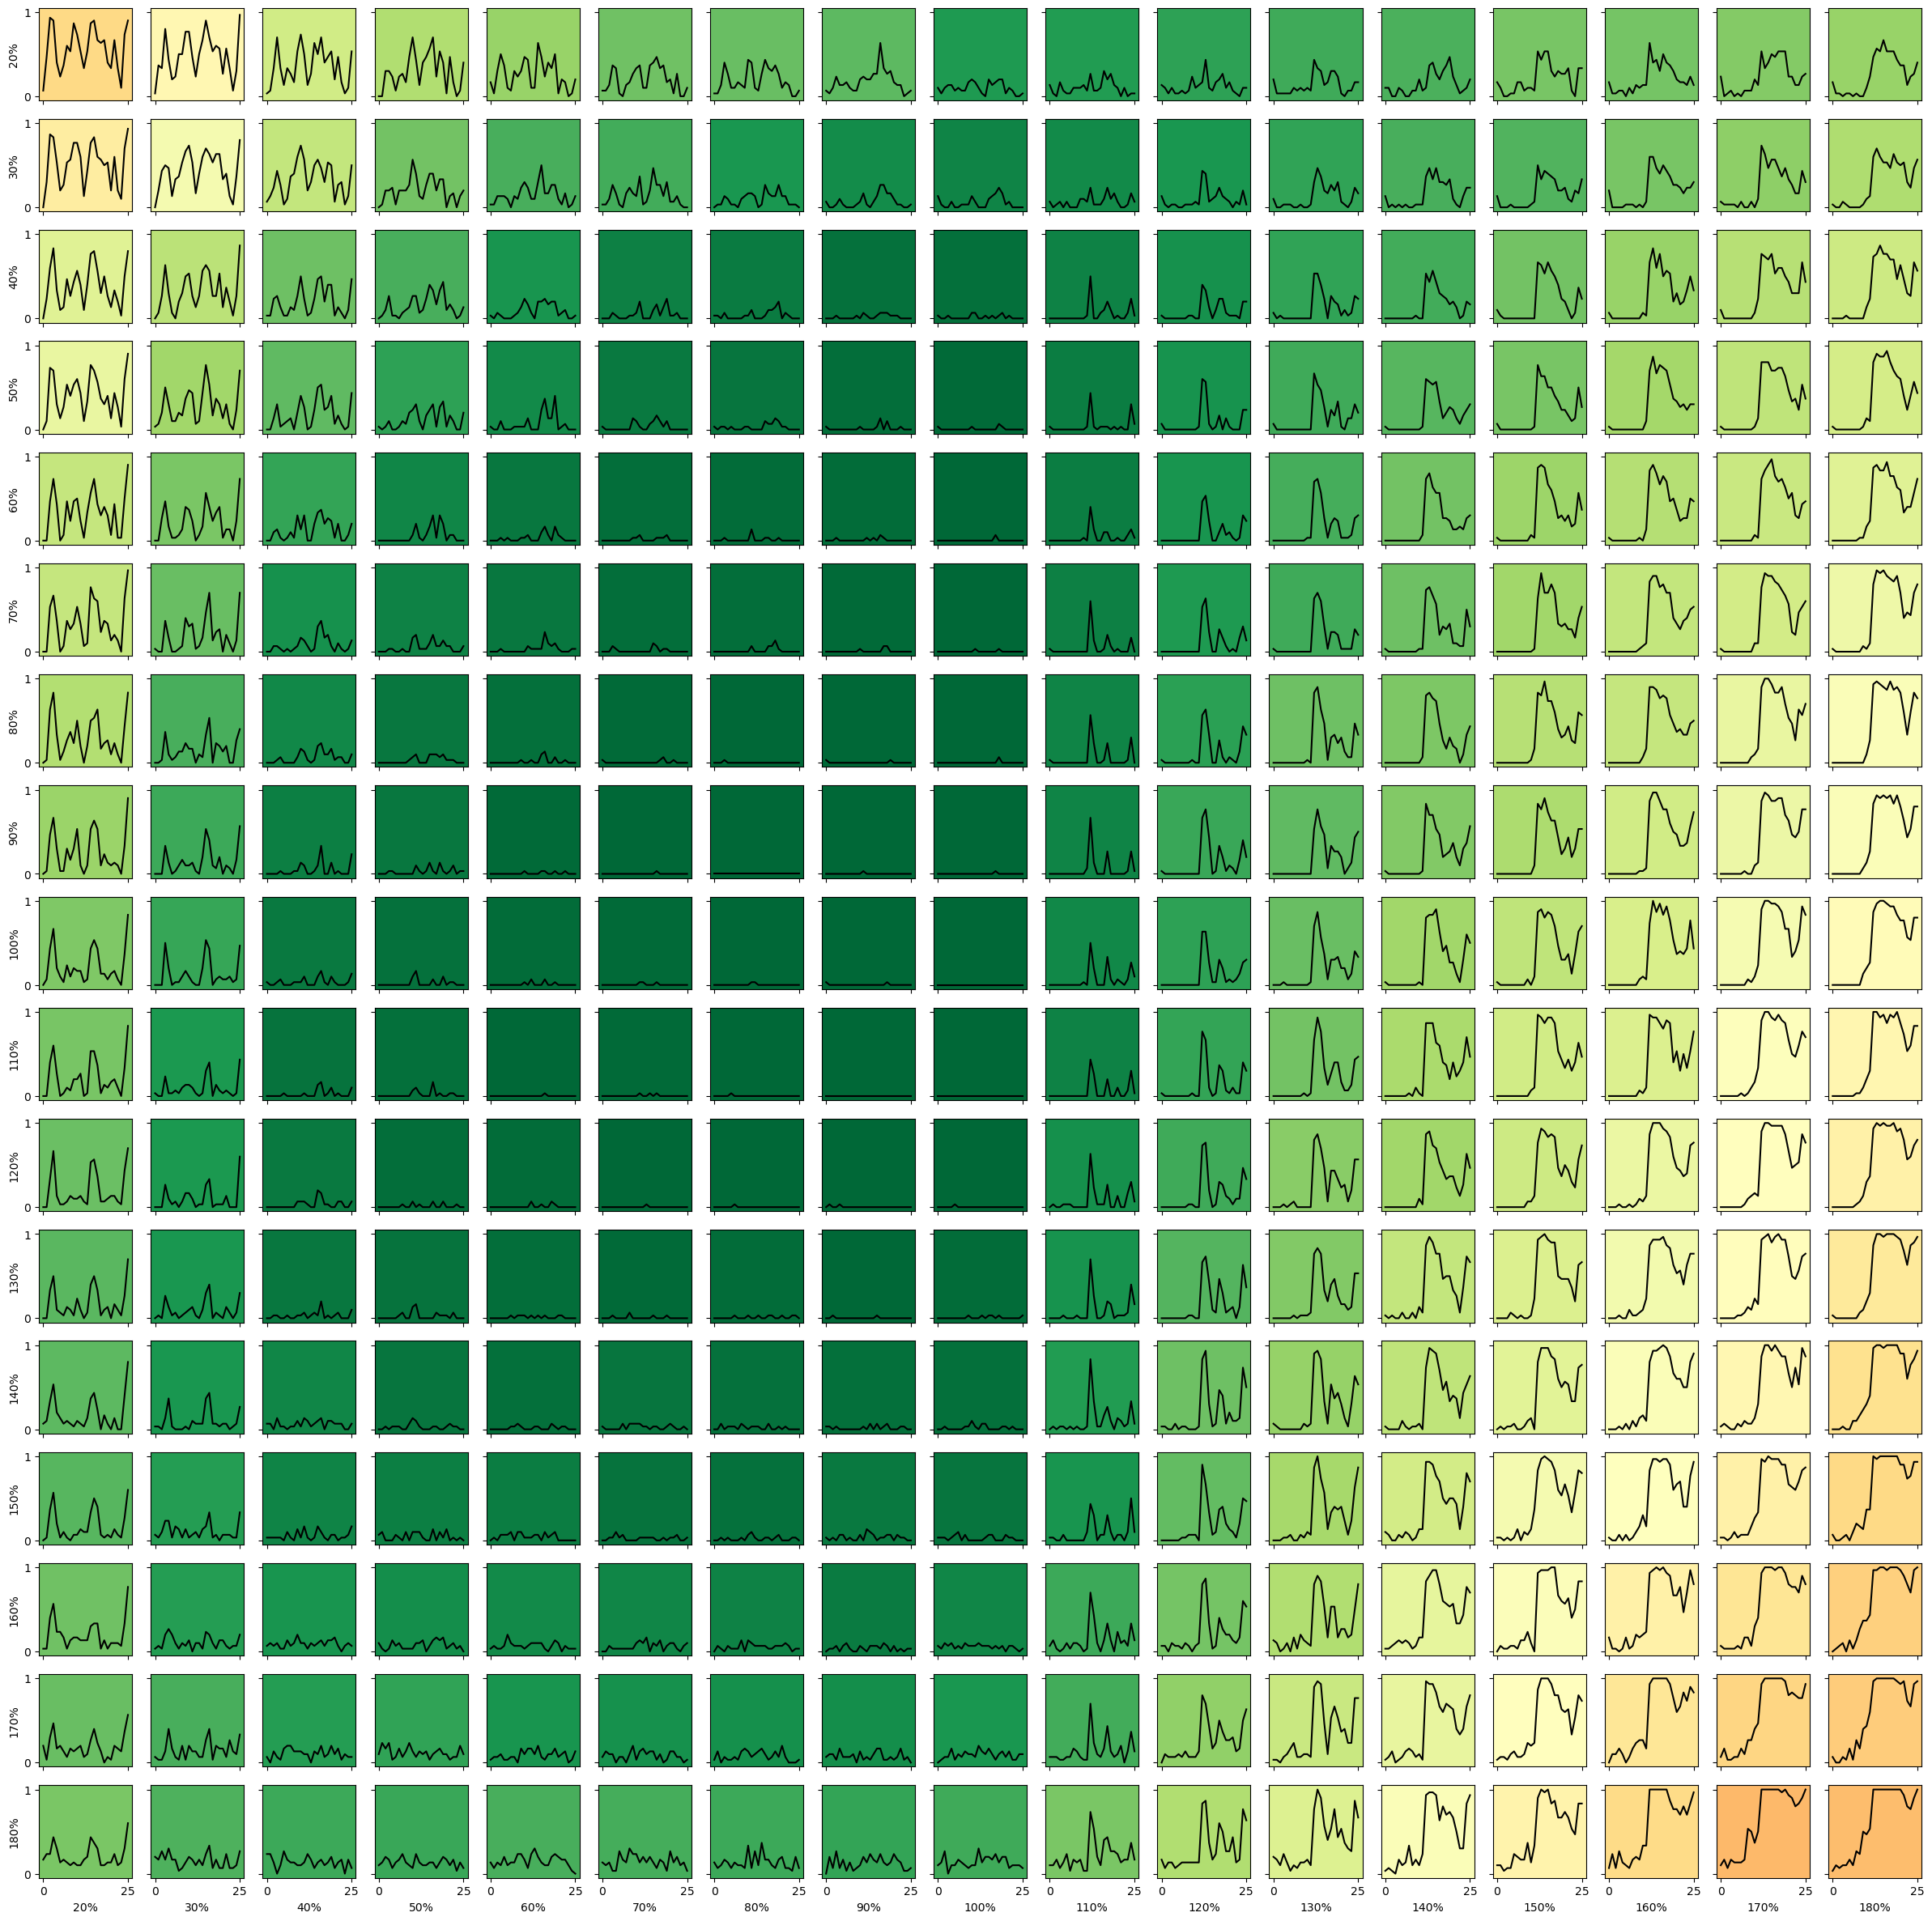

In [23]:
cm = mpl.colormaps['RdYlGn_r']

fig, axes = plt.subplots(17,17, figsize=(30,30), sharex=True, sharey=True)
ax_list = axes.T.ravel()

for f, ax, (x_change, y_change) in zip(files, ax_list, change_sets):
    df = pd.read_csv(folder + f)
    df['x_cell'] = (df['x'] / 10).astype(int)
    # df['opt_to_real'] = df['opt_traj'] / df['steps_taken']
    df['unconverged'] = (df['steps_taken'] == 1001).astype(int)
    values = list(df.groupby('x_cell').agg({'unconverged': 'sum'}).to_dict()['unconverged'].values())

    avg_val = df['unconverged'].sum()
    normalized_avg_val = (avg_val) / 720

    ax.set_facecolor(cm(normalized_avg_val))
    ax.plot(np.arange(len(values)), (np.array(values) / 30), color='black')

    ax.set_yticks([0,1])
    if x_change == 0.2:
        ax.set_ylabel(f'{int(y_change * 100)}%')

    ax.set_xticks([0,25])
    if y_change == 1.8:
        ax.set_xlabel(f'{int(x_change * 100)}%')

# Variation on x-axis filtered

/tmp/ipykernel_1566014/456671302.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filt['x_cell'] = (df_filt['x'] / 10).astype(int)
/tmp/ipykernel_1566014/456671302.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filt['opt_to_real'] = df_filt['opt_traj'] / df_filt['steps_taken']
/tmp/ipykernel_1566014/456671302.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

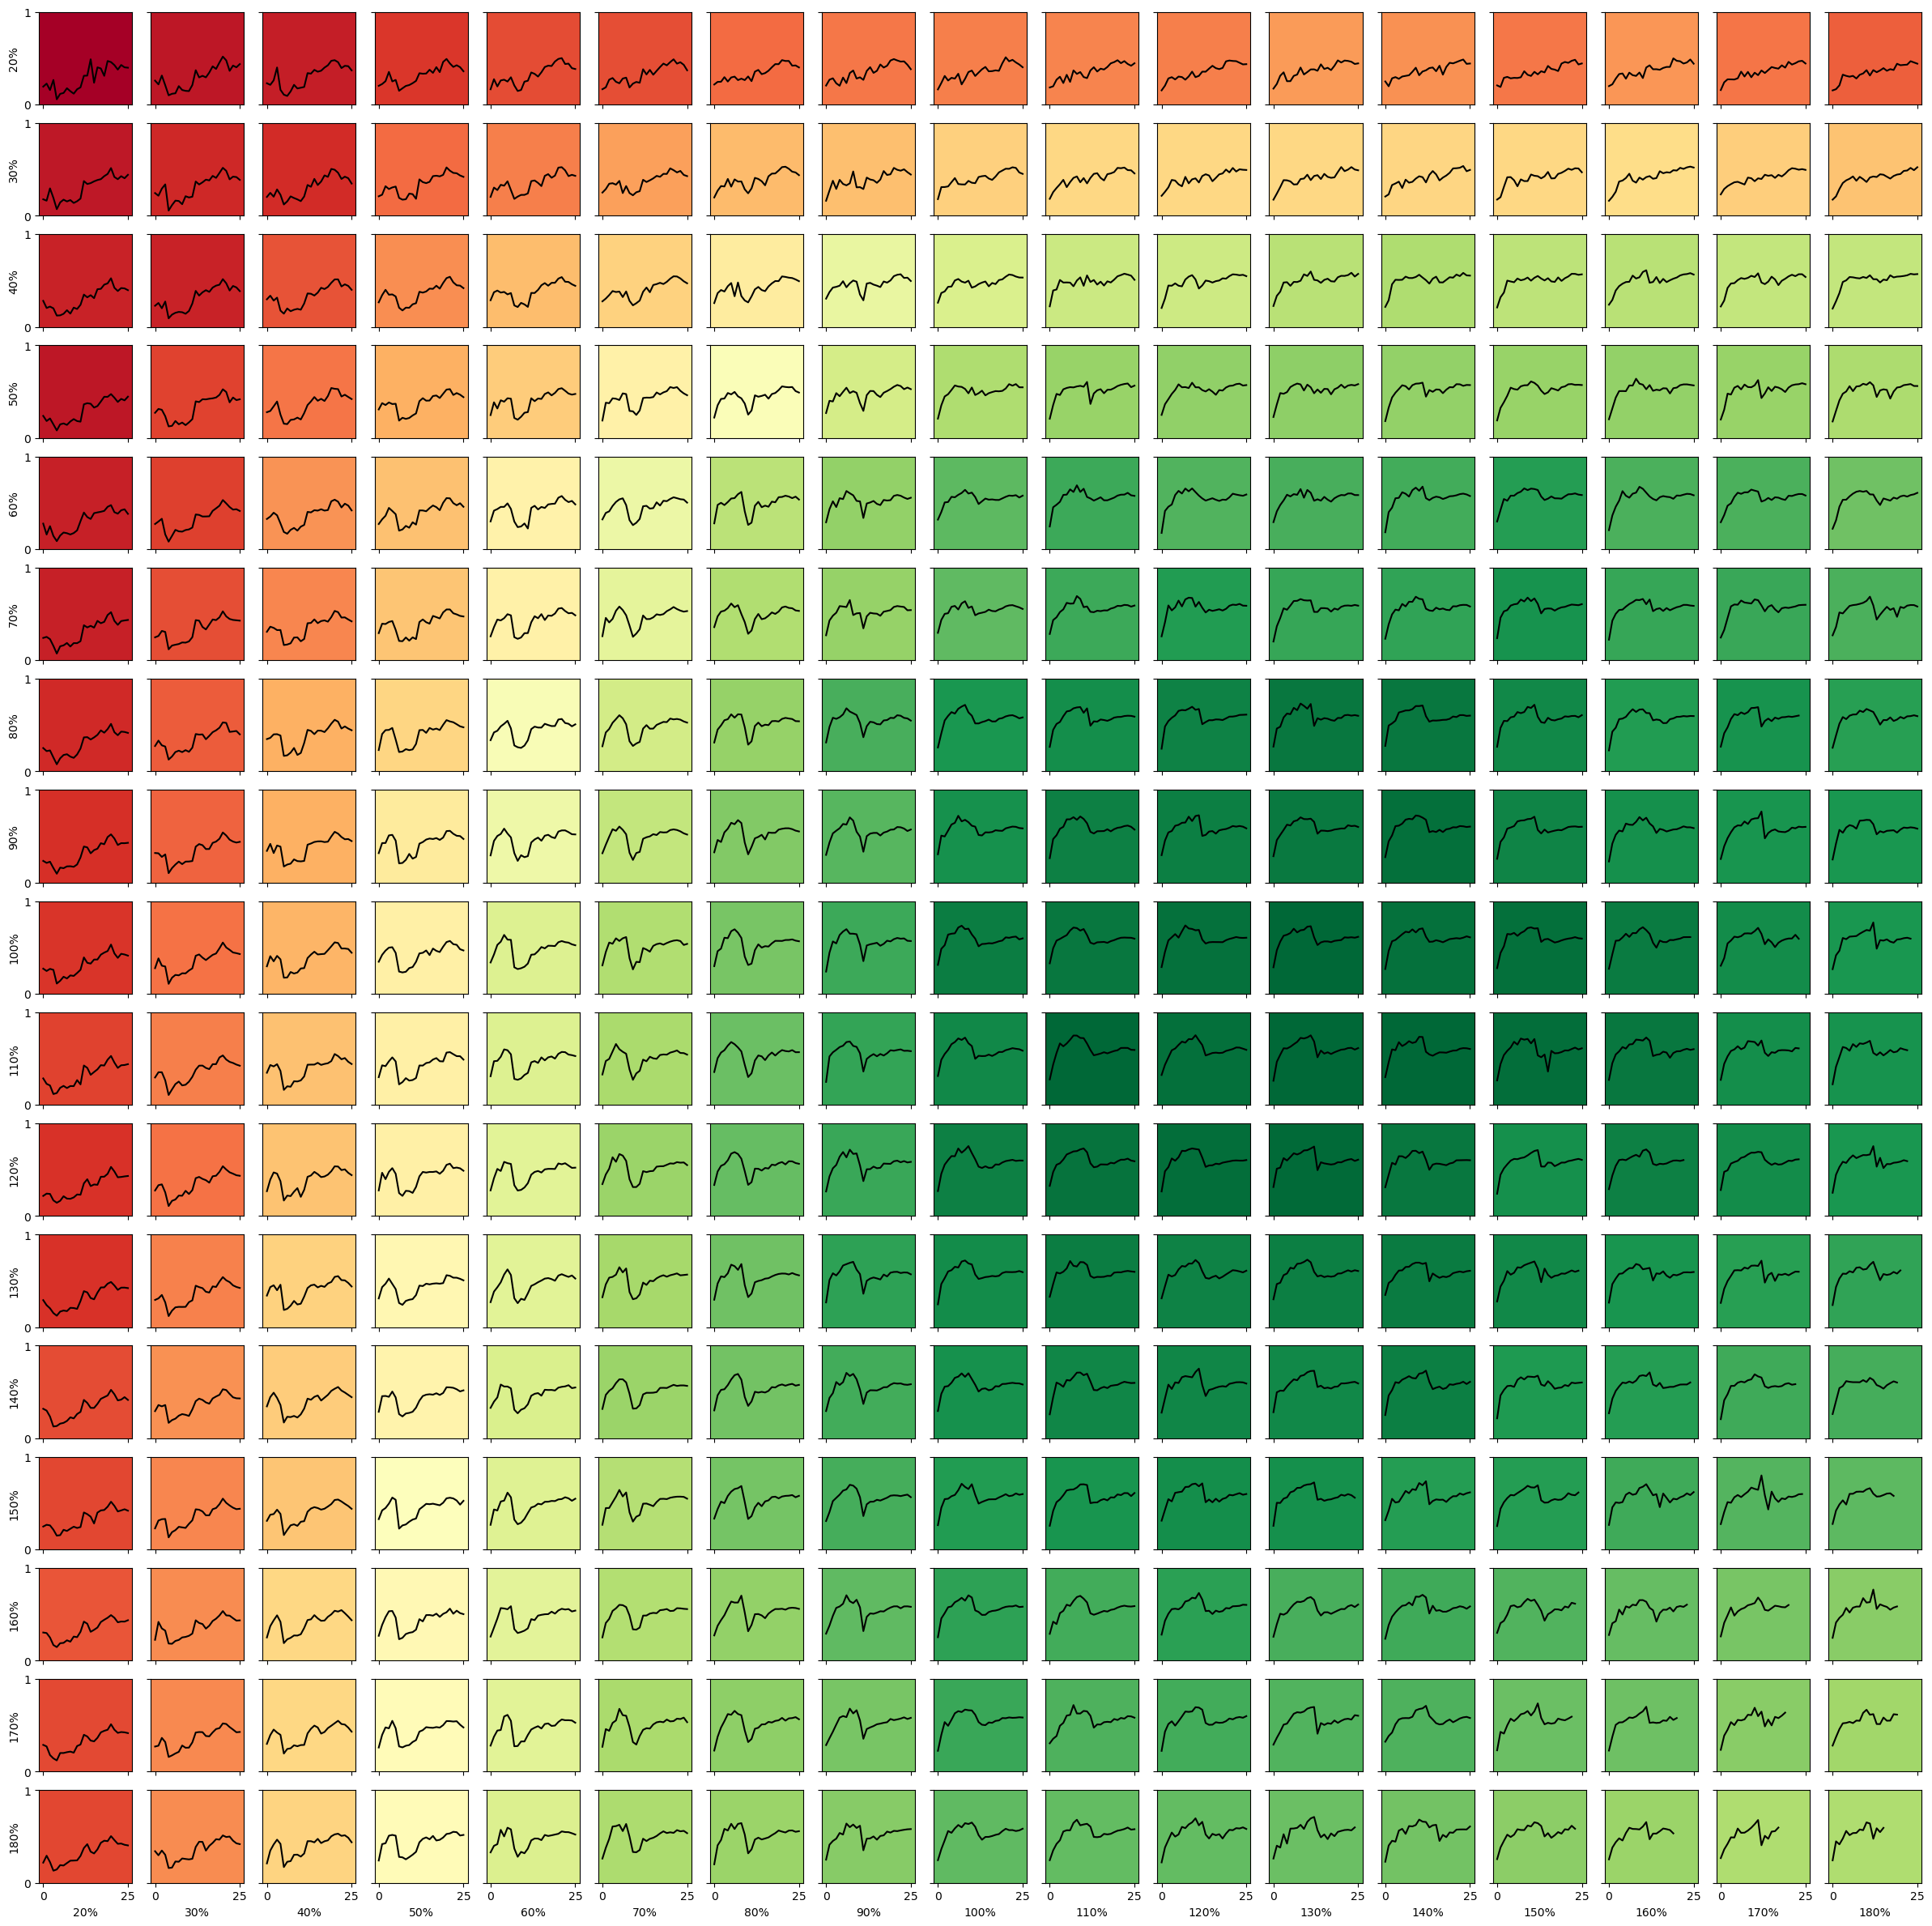

In [24]:
cm = mpl.colormaps['RdYlGn']

fig, axes = plt.subplots(17,17, figsize=(30,30), sharex=True, sharey=True)
ax_list = axes.T.ravel()

for f, ax, (x_change, y_change) in zip(files, ax_list, change_sets):
    df = pd.read_csv(folder + f)
    df_filt = df.loc[df['steps_taken'] != 1001]
    df_filt['x_cell'] = (df_filt['x'] / 10).astype(int)
    df_filt['opt_to_real'] = df_filt['opt_traj'] / df_filt['steps_taken']
    values = list(df_filt.groupby('x_cell').agg({'opt_to_real': 'mean'}).to_dict()['opt_to_real'].values())

    avg_val = df_filt['opt_to_real'].mean()
    normalized_avg_val = (avg_val - min_val) / range_val

    ax.set_facecolor(cm(normalized_avg_val))
    ax.plot(np.arange(len(values)), values, color='black')

    ax.set_yticks([0,1])
    if x_change == 0.2:
        ax.set_ylabel(f'{int(y_change * 100)}%')

    ax.set_xticks([0,25])
    if y_change == 1.8:
        ax.set_xlabel(f'{int(x_change * 100)}%')

In [25]:
extra_steps_filt = []

for f in files:
    df = pd.read_csv(folder + f)
    df_filt = df.loc[df['steps_taken'] != 1001]
    extra_steps_filt.append((df_filt['extra_steps']).mean())

extra_steps_filt = np.array(extra_steps_filt)